## The following notebook attempts to train a SVM classifier to recognise proper news articles from fake news articles,sattires,etc 

**The dataset used can be found in a csv file along with this notebook . I used BeautifulSoup api to scrape news articles from some popular news websites like the ANI,QUINT,etc and news sattires from websites like Scroll,FakingNews,etc and labelled them as 0 for genuine news and 1 for not news**

*Using pandas to read the dataset*

In [34]:
import pandas as pd
df=pd.read_csv('train_data.csv')
df.head()

,Head,Body,Label,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145
0,‘Sitting upon a volcano’: Doctors in Bengal ri...,The population of West Bengal is three times t...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Covid-19: As millions fear starvation, activis...",The Right to Food Campaign on Tuesday issued a...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Delhi violence: UAPA against Jamia students an...,Human rights organisation Amnesty Internationa...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,By crowdfunding benefits for embattled workers...,"For urban Indians, the Covid-19 lockdown has m...",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,The Art of Solitude: Franklin Boukaka and Manu...,Jazz has always brought me joy. This fortnight...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


*Removing unnecessary columns from dataframe*

In [35]:
df.drop(df.iloc[:,3:],inplace=True,axis=1)
df

,Head,Body,Label
0,‘Sitting upon a volcano’: Doctors in Bengal ri...,The population of West Bengal is three times t...,1.0
1,"Covid-19: As millions fear starvation, activis...",The Right to Food Campaign on Tuesday issued a...,1.0
2,Delhi violence: UAPA against Jamia students an...,Human rights organisation Amnesty Internationa...,1.0
3,By crowdfunding benefits for embattled workers...,"For urban Indians, the Covid-19 lockdown has m...",1.0
4,The Art of Solitude: Franklin Boukaka and Manu...,Jazz has always brought me joy. This fortnight...,1.0
...,...,...,...
3402,"We just asked him to introduce himself, will a...",Encouraged by the response to Ramayan and Maha...,1.0
3403,Mumbai Police taping Arnab's mouth shut while ...,There is some good news for Whatsapp admins wh...,1.0
3404,"Mumbai police calls Arnab for interrogation, A...",In an effort to prevent the spread of coronavi...,1.0
3405,"Coronavirus enters Arnab’s debate show, team o...",As number of coronavirus related cases see a r...,1.0


*Removing articles that have been scraped more than once*

In [36]:
df.drop_duplicates(subset="Head",inplace=True)
df

,Head,Body,Label
0,‘Sitting upon a volcano’: Doctors in Bengal ri...,The population of West Bengal is three times t...,1.0
1,"Covid-19: As millions fear starvation, activis...",The Right to Food Campaign on Tuesday issued a...,1.0
2,Delhi violence: UAPA against Jamia students an...,Human rights organisation Amnesty Internationa...,1.0
3,By crowdfunding benefits for embattled workers...,"For urban Indians, the Covid-19 lockdown has m...",1.0
4,The Art of Solitude: Franklin Boukaka and Manu...,Jazz has always brought me joy. This fortnight...,1.0
...,...,...,...
3297,"Desperate to go ahead with IPL, BCCI announces...",New Delhi. World Cup winner Gautam Gambhir too...,1.0
3335,"मोदीजी के 20 लाख करोड़ का लॉजिक, सुनिए भगतराम ...","Earlier on Thursday, Goswami had accused the C...",1.0
3387,Demand for Old Monk witnesses exponential incr...,"With number of cases on the rise, the medical ...",1.0
3388,"Goa could be declared a green zone, engineerin...",The post-match interaction with the press once...,1.0


*Dropping rows with NaN values if any*

In [72]:
df.dropna(inplace=True)


*Printing the no.of different labels present*

In [73]:
print(len(df[df["Label"]==1]))
print(len(df[df["Label"]==0]))


432
736


### NLP pipeline begins here
*Function to remove punctuation*

In [3]:
import string
def remove_punct(str):
    if(type(str) != float):
        txt = "".join([c for c in str if c not in string.punctuation])
        return txt

df['Clean_Body']=df['Body'].apply(lambda x:remove_punct(x))
df.head()

NameError: name 'df' is not defined

*Removing hindi characters from the text*

In [75]:
import codecs,string
def detect_language(character):
    maxchar = max(character)
    if u'\u0900' <= maxchar <= u'\u097f':
        return False
    else:
        return True

    
def sanitize(text):
    text=str(text)
    para ="".join([c for c in text if (detect_language(c))])
    return para

df['Clean_Body']=df['Clean_Body'].apply(lambda x:sanitize(x))

    

*Tokenizing the text*

In [76]:
import re
def tokenize(text):
    text=str(text)
    tokens=re.split('\W+',text)
    return tokens

df['Clean_Body']=df['Clean_Body'].apply(lambda x:tokenize(x))

df.head()

,Head,Body,Label,Clean_Body
0,‘Sitting upon a volcano’: Doctors in Bengal ri...,The population of West Bengal is three times t...,1.0,"[The, population, of, West, Bengal, is, three,..."
1,"Covid-19: As millions fear starvation, activis...",The Right to Food Campaign on Tuesday issued a...,1.0,"[The, Right, to, Food, Campaign, on, Tuesday, ..."
2,Delhi violence: UAPA against Jamia students an...,Human rights organisation Amnesty Internationa...,1.0,"[Human, rights, organisation, Amnesty, Interna..."
3,By crowdfunding benefits for embattled workers...,"For urban Indians, the Covid-19 lockdown has m...",1.0,"[For, urban, Indians, the, Covid19, lockdown, ..."
4,The Art of Solitude: Franklin Boukaka and Manu...,Jazz has always brought me joy. This fortnight...,1.0,"[Jazz, has, always, brought, me, joy, This, fo..."


*Function to lemmatize the words. Uses the WordNetLemmatizer from nltk library*

In [77]:
import nltk

wnl=nltk.WordNetLemmatizer()
def lemmatize(words):
    word=[wnl.lemmatize(word) for word in words]
    return word


df['Clean_Body']=df['Clean_Body'].apply(lambda x:lemmatize(x))
df.head()


,Head,Body,Label,Clean_Body
0,‘Sitting upon a volcano’: Doctors in Bengal ri...,The population of West Bengal is three times t...,1.0,"[The, population, of, West, Bengal, is, three,..."
1,"Covid-19: As millions fear starvation, activis...",The Right to Food Campaign on Tuesday issued a...,1.0,"[The, Right, to, Food, Campaign, on, Tuesday, ..."
2,Delhi violence: UAPA against Jamia students an...,Human rights organisation Amnesty Internationa...,1.0,"[Human, right, organisation, Amnesty, Internat..."
3,By crowdfunding benefits for embattled workers...,"For urban Indians, the Covid-19 lockdown has m...",1.0,"[For, urban, Indians, the, Covid19, lockdown, ..."
4,The Art of Solitude: Franklin Boukaka and Manu...,Jazz has always brought me joy. This fortnight...,1.0,"[Jazz, ha, always, brought, me, joy, This, for..."


In [98]:
df.shape

(1168, 4)

*Vectorization of the cleaned and tokenized text.*
*I have used the TF-IDF vectorizer as it suits my needs.*
*One can also go for CountVectorization or the N-gram vectorizer.*

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect=TfidfVectorizer(analyzer=lemmatize)
x=tfidf_vect.fit_transform(df['Clean_Body'])
data=pd.DataFrame(x.toarray(),columns=tfidf_vect.get_feature_names())
data.head()

,,0,00,006,007,008,01,019,02,022,...,zonesThis,zoo,zoom,zoombombing,zoomed,zooming,zygomatic,Éamon,出街一定要帶嘅嘢,同埋記住佢係易燃物品
0,0.013901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.009672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
np.shape(x.toarray())

(1168, 36937)

**Optional. I was trying to be sure none of the values had blown out of size after vectorization**

In [79]:
list=np.where(data.values >= np.finfo(np.float64).max)
for i,j in data.iterrows():
    for val in j.iteritems():
        if val[1] >= np.finfo(np.float64).max:
            print("postive")


### This were i tried to do some feature engineering ###

*Creating a copy of the Dataframe for feautre engineering*

In [80]:
df_copy=pd.read_csv('train_data.csv')
df_copy.drop(df_copy.iloc[:,3:],inplace=True,axis=1)
df_copy.drop_duplicates(subset="Head",inplace=True)
df_copy.head()



,Head,Body,Label
0,‘Sitting upon a volcano’: Doctors in Bengal ri...,The population of West Bengal is three times t...,1.0
1,"Covid-19: As millions fear starvation, activis...",The Right to Food Campaign on Tuesday issued a...,1.0
2,Delhi violence: UAPA against Jamia students an...,Human rights organisation Amnesty Internationa...,1.0
3,By crowdfunding benefits for embattled workers...,"For urban Indians, the Covid-19 lockdown has m...",1.0
4,The Art of Solitude: Franklin Boukaka and Manu...,Jazz has always brought me joy. This fortnight...,1.0


*I thought the punctuation count might be a good feature to distinguish between real and fake news. So here's a function i wrote to save the punctuation count in a separate column for each article*

In [81]:
def punct_count(text):
    text=str(text)
    count=0
    for c in text:
        if(c not in string.punctuation):
            count=count+1
    return count

df_copy['punct_count']=df_copy['Body'].apply(lambda x:punct_count(x))
df_copy.head()
            
    

,Head,Body,Label,punct_count
0,‘Sitting upon a volcano’: Doctors in Bengal ri...,The population of West Bengal is three times t...,1.0,5793
1,"Covid-19: As millions fear starvation, activis...",The Right to Food Campaign on Tuesday issued a...,1.0,5115
2,Delhi violence: UAPA against Jamia students an...,Human rights organisation Amnesty Internationa...,1.0,3265
3,By crowdfunding benefits for embattled workers...,"For urban Indians, the Covid-19 lockdown has m...",1.0,8730
4,The Art of Solitude: Franklin Boukaka and Manu...,Jazz has always brought me joy. This fortnight...,1.0,1862


*Heres a plot of the punctuation count for the two categories using matplotlib.*
*Turns out its not a good feature to distinguish after all !* 

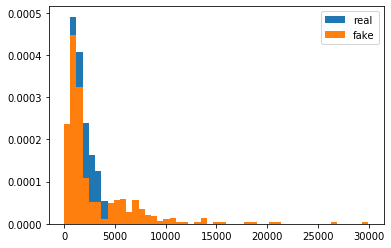

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
bins=np.linspace(df_copy['punct_count'].min(),df_copy['punct_count'].max())
plt.hist(df_copy[df_copy['Label']==0]['punct_count'],bins,label='real',density=True)
plt.hist(df_copy[df_copy['Label']==1]['punct_count'],bins,label='fake',density=True)
plt.legend(loc='upper right')
plt.show()


*Similarly I thought that No.of Stopwords might also be a good feature to distinguish between real and fake news. So here's a function i wrote to save the stopword count in a separate column for each article.*

In [83]:

stopwords=nltk.corpus.stopwords.words('english')
def stop_count(text):
    count=0
    text=str(text)
    for c in text:
        if(c in stopwords):
            count=count+1
    return count
df_copy['stop_count']=df_copy['Body'].apply(lambda x:remove_punct(x))
df_copy['stop_count']=df_copy['stop_count'].apply(lambda x:tokenize(x))
df_copy['stop_count']=df_copy['stop_count'].apply(lambda x:stop_count(x))
df_copy.head()

    

,Head,Body,Label,punct_count,stop_count
0,‘Sitting upon a volcano’: Doctors in Bengal ri...,The population of West Bengal is three times t...,1.0,5793,2253
1,"Covid-19: As millions fear starvation, activis...",The Right to Food Campaign on Tuesday issued a...,1.0,5115,2035
2,Delhi violence: UAPA against Jamia students an...,Human rights organisation Amnesty Internationa...,1.0,3265,1269
3,By crowdfunding benefits for embattled workers...,"For urban Indians, the Covid-19 lockdown has m...",1.0,8730,3258
4,The Art of Solitude: Franklin Boukaka and Manu...,Jazz has always brought me joy. This fortnight...,1.0,1862,685


*Heres a plot of the stopword count for the two categories using matplotlib. Turns out its not a good feature to distinguish either !*

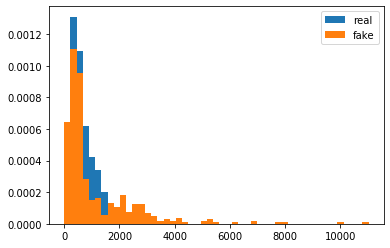

In [84]:
import matplotlib.pyplot as plt1
%matplotlib inline
import numpy as np1
bins=np1.linspace(df_copy['stop_count'].min(),df_copy['stop_count'].max())
plt1.hist(df_copy[df_copy['Label']==0]['stop_count'],bins,label='real',density=True)
plt1.hist(df_copy[df_copy['Label']==1]['stop_count'],bins,label='fake',density=True)
plt1.legend(loc='upper right')
plt1.show()

*Same thing happened when I wrote a function to use document length as a feature and plotted the result but to no use !*

In [85]:
def get_doc_length(text):
    text=str(text)
    return len(text)

df_copy['Body']=df_copy['Body'].apply(lambda x:remove_punct(x))
df_copy['doc_len']=df_copy['Body'].apply(lambda x:get_doc_length(x))
df_copy.head()

,Head,Body,Label,punct_count,stop_count,doc_len
0,‘Sitting upon a volcano’: Doctors in Bengal ri...,The population of West Bengal is three times t...,1.0,5793,2253,5793
1,"Covid-19: As millions fear starvation, activis...",The Right to Food Campaign on Tuesday issued a...,1.0,5115,2035,5115
2,Delhi violence: UAPA against Jamia students an...,Human rights organisation Amnesty Internationa...,1.0,3265,1269,3265
3,By crowdfunding benefits for embattled workers...,For urban Indians the Covid19 lockdown has mad...,1.0,8730,3258,8730
4,The Art of Solitude: Franklin Boukaka and Manu...,Jazz has always brought me joy This fortnight ...,1.0,1862,685,1862


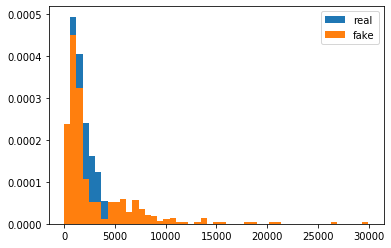

In [86]:
import matplotlib.pyplot as plt2
%matplotlib inline
import numpy as np2
bins=np2.linspace(df_copy['doc_len'].min(),df_copy['doc_len'].max())
plt2.hist(df_copy[df_copy['Label']==0]['doc_len'],bins,label='real',density=True)
plt2.hist(df_copy[df_copy['Label']==1]['doc_len'],bins,label='fake',density=True)
plt2.legend(loc='upper right')
plt2.show()

*Splitting the data into training and test sets as usual*

In [89]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(data,df['Label'],shuffle=True)
print(x_train)

                  0   00  006  007  008   01  019   02  022  ...  zonesThis  \
905   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        0.0   
35    0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        0.0   
98    0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        0.0   
537   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        0.0   
820   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        0.0   
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...        ...   
1025  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        0.0   
539   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        0.0   
750   0.021243  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        0.0   
816   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        0.0   
736   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        0.0   

      zoo  zoom  zoombombing  zoomed  zooming  zygo

*Training a SVM from sklearn on x_train and y_train*

In [90]:
from sklearn import svm
classifier=svm.SVC()
classifier.fit(x_train,y_train)
pred=classifier.predict(x_test)

*I printed the accuracy score for my model but it was only 93 %*

In [91]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(accuracy_score(y_test,pred))

0.934931506849315


*So I decided to do a GridSearch inorder to find the best set of parameters and kernel for my model. This time the result was comparitively better at 95%*

In [92]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['linear','rbf','sigmoid']}
 ]
model=GridSearchCV(svm.SVC(),param_grid)
model.fit(x_train,y_train)
pred_new = model.predict(x_test)
print(accuracy_score(y_test,pred_new))

0.9554794520547946


*Here are the parameters of the final model*

In [6]:
print(model.get_params())

NameError: name 'model' is not defined

*Finally I used pickle to save my model for future use in apps*

In [95]:
import pickle
pickle.dump(model,open('fake_svm.pkl','wb'))